# First Time Twinning device Test

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.pyplot as plt

In [17]:
# Define column names
column_names = ['timestamp', 'duration', 'event']

# Load data
df = pd.read_csv('twin_test.csv', names=column_names)

In [18]:
# Parse timestamp column
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [19]:
# Getting the min, max, and average duration per event
summary_df = df.groupby('event')['duration'].agg(['min', 'max', 'mean'])

In [22]:
event_order = [
    "Ditto start",
    "Mosquitto start",
    "start container smart device",
    "Create DT",
    "Check DT latest status",
    "Start sending data to DT"
]

In [23]:
# Make the "event" column a categorical type with the specified order
df['event'] = pd.Categorical(df['event'], categories=event_order, ordered=True)

# Get the min, max, and average duration per event
summary_df = df.groupby('event')['duration'].agg(['min', 'max', 'mean'])

# Reset the index to get the "event" column back
summary_df.reset_index(inplace=True)


In [24]:
# Show the summary dataframe
print(summary_df)

                          event        min        max       mean
0                   Ditto start   3.690132   6.793766   4.513298
1               Mosquitto start  24.247342  27.232662  25.630511
2  start container smart device   0.502970   1.840123   0.831722
3                     Create DT   6.843666  74.535552  10.065059
4        Check DT latest status   0.087073   0.489223   0.173905
5      Start sending data to DT   0.105006   0.619952   0.192283


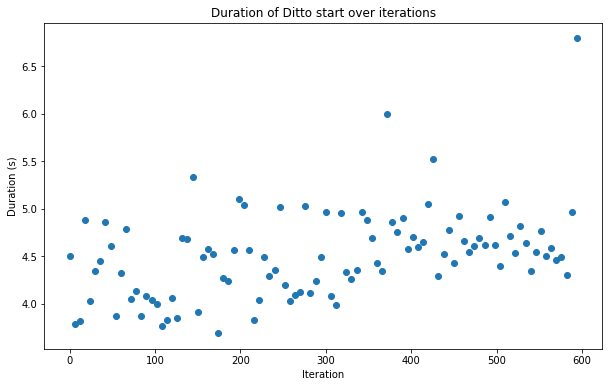

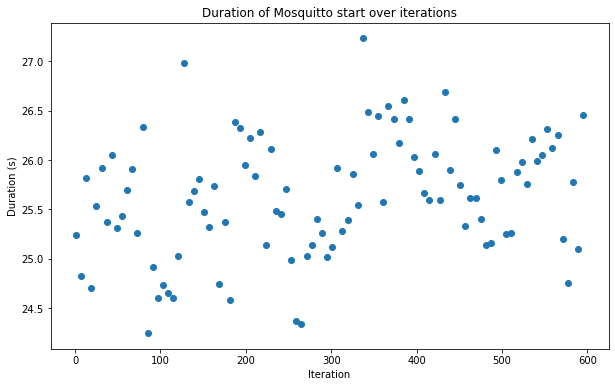

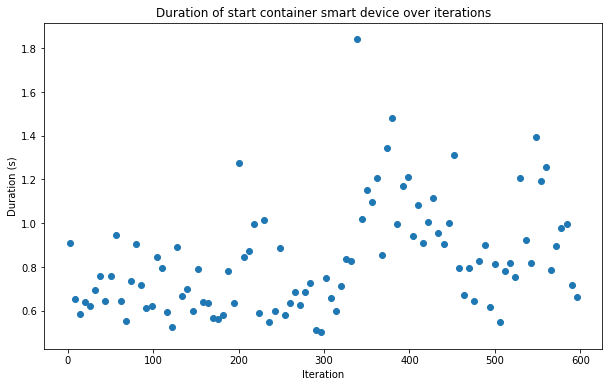

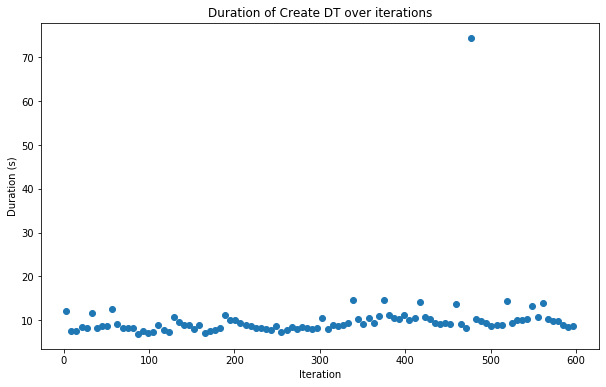

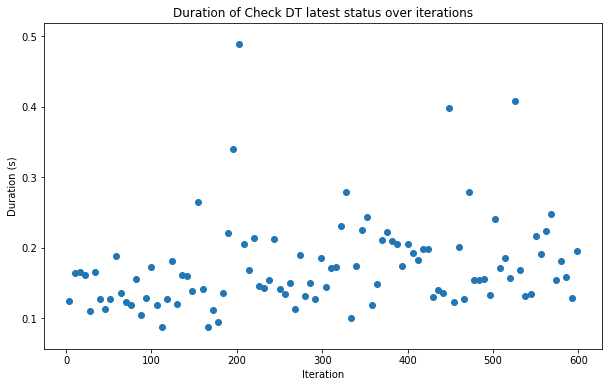

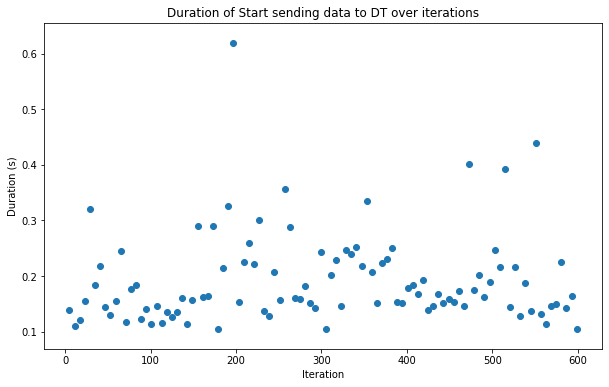

In [26]:
# Create a scatter plot for each event
for event in event_order:
    event_df = df[df['event'] == event]
    plt.figure(figsize=(10, 6))
    plt.scatter(event_df.index, event_df['duration'])
    plt.title(f"Duration of {event} over iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Duration (s)")
    plt.show()